# Create data set

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
from sklearn.datasets import make_moons

In [8]:
from sklearn.datasets import make_classification

In [9]:

# Step 1: Generate a 2D classification dataset with 2 clusters/classes
X, y = make_classification(
    n_samples=200,      # number of samples
    n_features=2,       # 2 features for 2D data (X, Y)
    n_informative=2,    # both features are informative
    n_redundant=0,      # no redundant features
    n_clusters_per_class=1,  # 1 cluster per class
    n_classes=2,        # 2 classes: 0 and 1
    #random_state=42     # reproducibility
)


In [ ]:
# Generate dataset with two moon-shaped clusters
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Create DataFrame
df = pd.DataFrame(X, columns=['X', 'Y'])
df['class'] = y

In [12]:
df = pd.DataFrame(X, columns=['X', 'Y'])
df['class'] = y

In [13]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

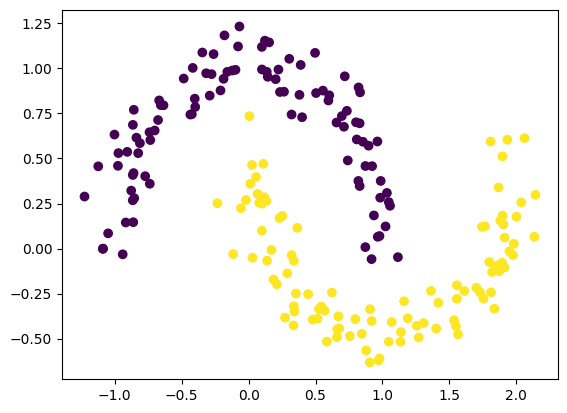

In [14]:
plt.scatter(X[:,0],X[:,1],c=y)

# Apply logistics regression

In [15]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [16]:
clf.fit(X,y)

LogisticRegression()

<Axes: >

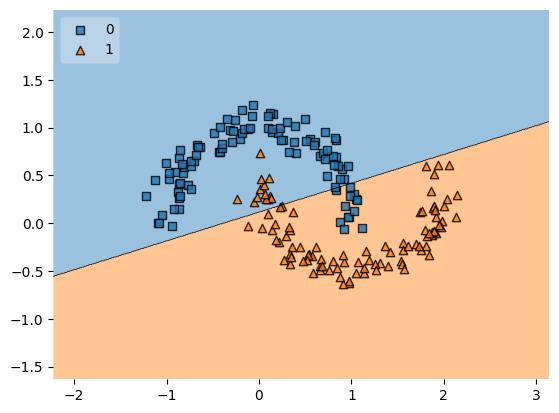

In [17]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y.astype('int'), clf, legend=2)

In [18]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,X,y,scoring='accuracy',cv=10))

np.float64(0.8700000000000001)

# Apply polynomial with logistic regression

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)
X_trf = poly.fit_transform(X)

In [20]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1,X_trf,y,scoring='accuracy',cv=10))

np.float64(0.96)

# create a function to see the decision boundary

In [21]:
def plot_decision_boundary(X,y,degree=1):
    
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)
    
    clf = LogisticRegression()
    clf.fit(X_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
    
    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

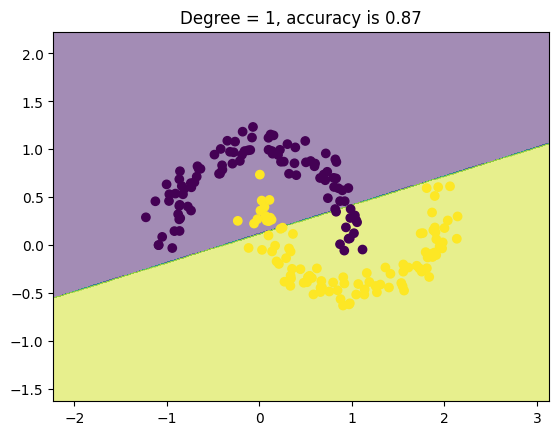

In [22]:
plot_decision_boundary(X,y)

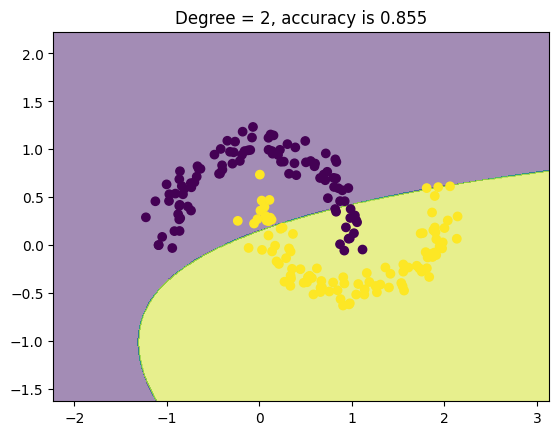

In [23]:
plot_decision_boundary(X,y,degree=2)

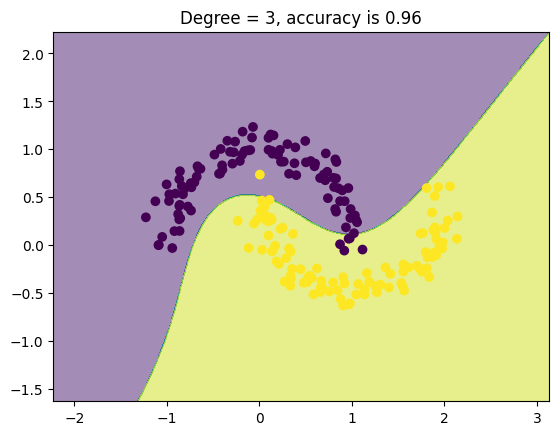

In [24]:
plot_decision_boundary(X,y,degree=3)

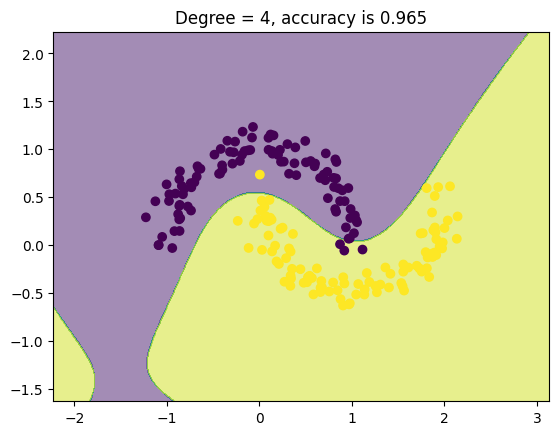

In [25]:
plot_decision_boundary(X,y,degree=4)

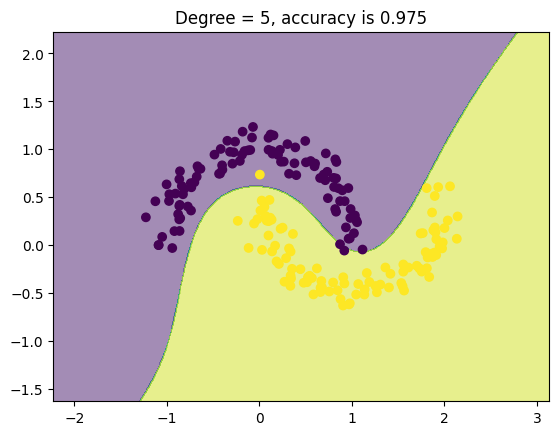

In [26]:
plot_decision_boundary(X,y,degree=5)

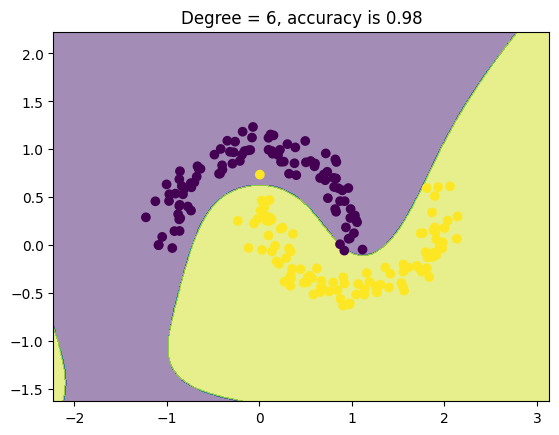

In [27]:
plot_decision_boundary(X,y,degree=6)

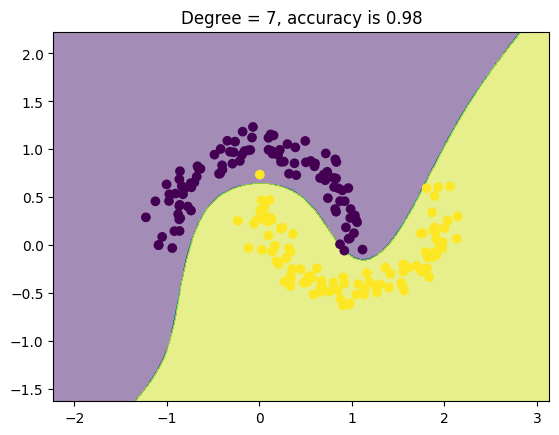

In [28]:
plot_decision_boundary(X,y,degree=7)

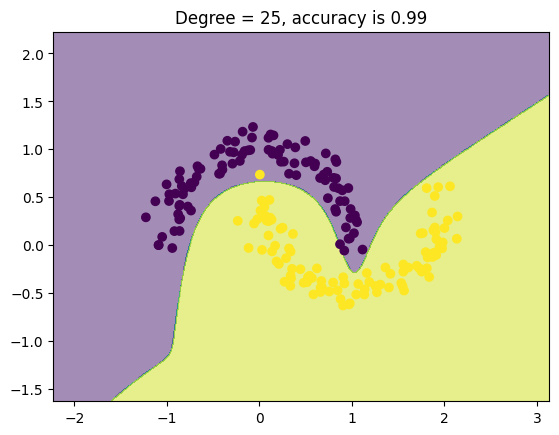

In [29]:
plot_decision_boundary(X,y,degree=25)